# Data Cleaning and Data Visualization for **Task A (Binary Faux-Hate Detection)**

## Libraries

In [ ]:
!pip install unidecode

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from unidecode import unidecode
from collections import Counter

## 1. Load the dataset

In [ ]:
file_path = '/content/drive/MyDrive/Icon Conference/Data/Train_Task_A.xlsx'
data_task_a = pd.read_excel(file_path)
data_task_a.head()

,Id,Tweet,Hate,Fake
0,5723,@sudhirchaudhary Abhi tak 2000 ke note me mujh...,0,0
1,2338,@Gulamane_raza @MustakimRazvi Abe katiye tumse...,1,1
2,1579,@RajatSharmaLive Ye sab sazish hai....bina sam...,1,1
3,6524,abe jao tum to dasko pahle hi fash gye the jab...,1,0
4,7618,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,0


## 2. Data cleaning function

In [ ]:
def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = str(text)
    text = re.sub(r'<br>', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#+', '', text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)

    return text.strip()


In [ ]:
original_string =
print("Original String: "+original_string)

cleaned_string = clean_text(original_string)
print("Cleaned String: "+cleaned_string)

Original String: @SantoshBarnwa20 @ARIF76939782 @iArvindKushwaha @HemantSorenJMM @DC_Ranchi 60% jamaat walon Ko corona hai
Cleaned String: 60 jamaat walon Ko corona hai


## 3. Apply Cleaning and save cleaned data to csv

In [ ]:
# Apply cleaning
data_task_a['Tweet'] = data_task_a['Tweet'].apply(clean_text)
data_task_a = data_task_a.dropna(subset=['Tweet'])

print(data_task_a.head())

# Save cleaned data to CSV
cleaned_file_path = '/content/drive/MyDrive/Icon Conference/Data/Cleaned_Task_A.csv'
data_task_a.to_csv(cleaned_file_path, index=False)

     Id                                              Tweet  Hate  Fake
0  5723  Abhi tak 2000 ke note me mujhe GPS nano chip n...     0     0
1  2338  Abe katiye tumse kuch huaa toh jata nahi bas b...     1     1
2  1579  Ye sab sazish haibina saman ke koi kaise apne ...     1     1
3  6524  abe jao tum to dasko pahle hi fash gye the jab...     1     0
4  7618  Ab ye afbah kaun faila Raha hai ki Shahhen bag...     0     0


## 4. Class assignment

In [ ]:
def assign_faux_class(row):
    if row['Fake'] == 0 and row['Hate'] == 0:
        return "Non-Fake, Non-Hate"
    elif row['Fake'] == 0 and row['Hate'] == 1:
        return "Non-Fake, Hate"
    elif row['Fake'] == 1 and row['Hate'] == 0:
        return "Fake, Non-Hate"
    elif row['Fake'] == 1 and row['Hate'] == 1:
        return "Fake, Hate"

In [ ]:
data_task_a['FAUX'] = data_task_a.apply(assign_faux_class, axis=1)

data_task_a.head()

,Id,Tweet,Hate,Fake,FAUX
0,5723,Abhi tak 2000 ke note me mujhe GPS nano chip n...,0,0,"Non-Fake, Non-Hate"
1,2338,Abe katiye tumse kuch huaa toh jata nahi bas b...,1,1,"Fake, Hate"
2,1579,Ye sab sazish haibina saman ke koi kaise apne ...,1,1,"Fake, Hate"
3,6524,abe jao tum to dasko pahle hi fash gye the jab...,1,0,"Non-Fake, Hate"
4,7618,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,0,"Non-Fake, Non-Hate"


## 5. Plot FAUX Class Distribution

<ipython-input-64-f98c45c19e79>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FAUX', data=data_task_a, palette="Set2")


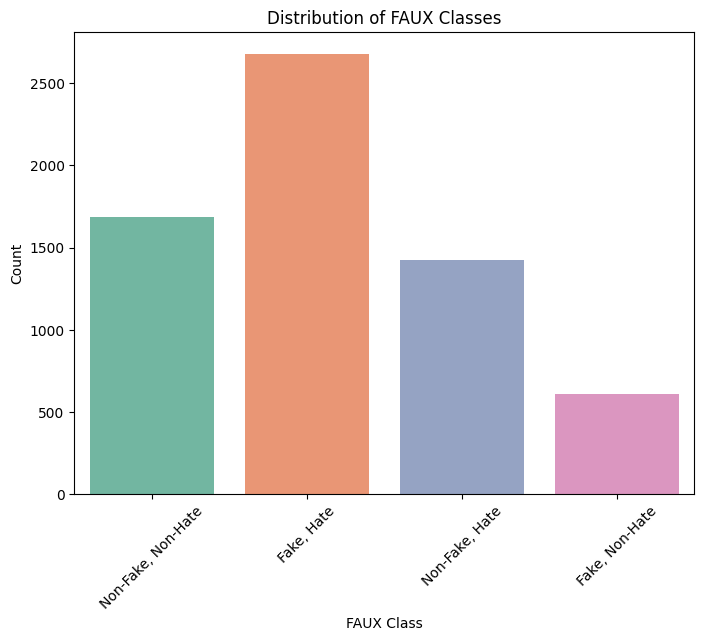

FAUX Class Distribution:
FAUX
Fake, Hate            2678
Non-Fake, Non-Hate    1687
Non-Fake, Hate        1423
Fake, Non-Hate         608
Name: count, dtype: int64


In [ ]:
# 1. Plot FAUX Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='FAUX', data=data_task_a, palette="Set2")
plt.title("Distribution of FAUX Classes")
plt.xlabel("FAUX Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Display FAUX class distribution counts
print("FAUX Class Distribution:")
print(data_task_a['FAUX'].value_counts())

## 6. Generate Word Clouds for Each FAUX Class

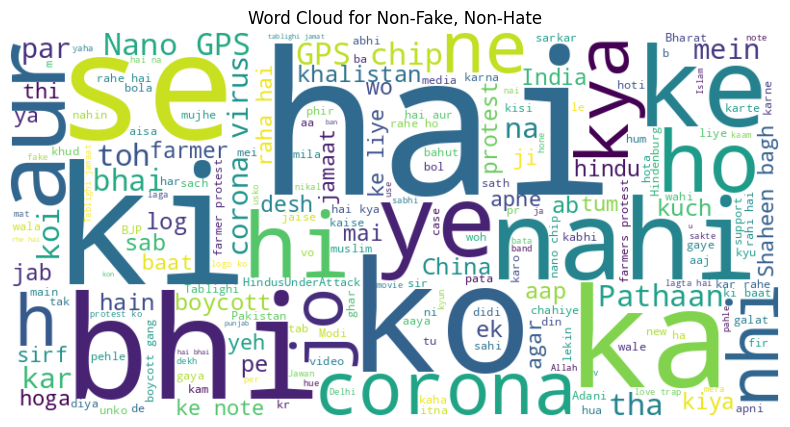

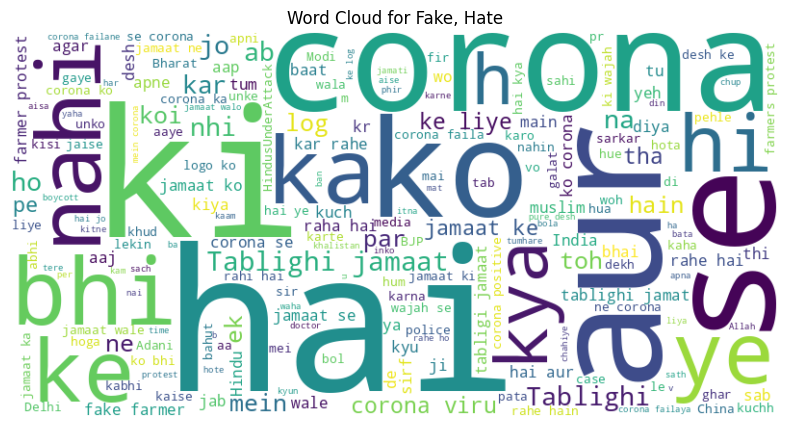

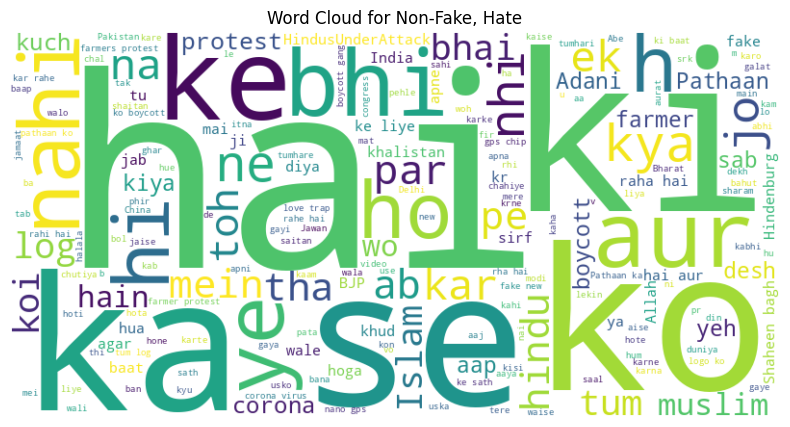

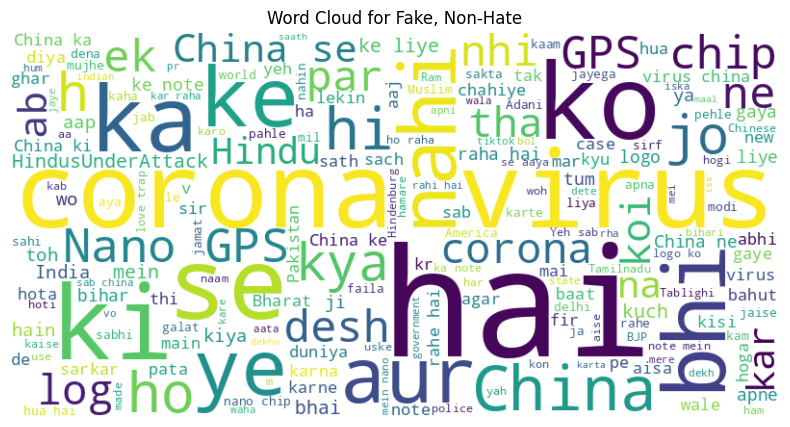

In [ ]:
for faux_class in data_task_a['FAUX'].unique():
    text = " ".join(tweet for tweet in data_task_a[data_task_a['FAUX'] == faux_class]['Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {faux_class}")
    plt.show()

## 7. Length Distribution of Tweets

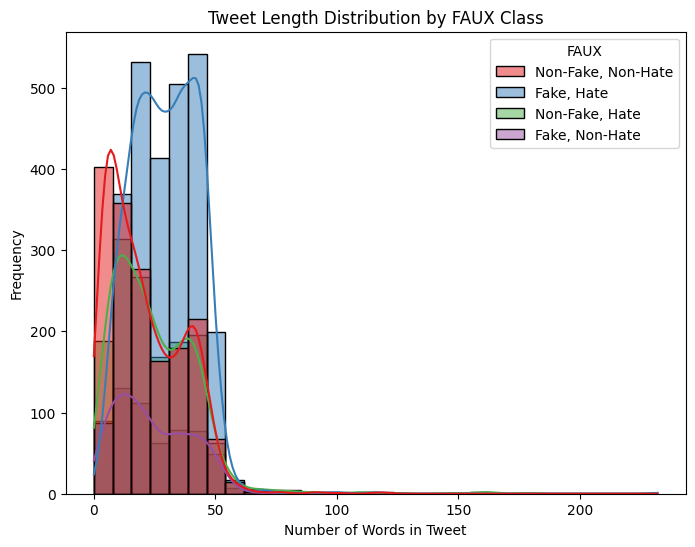

In [ ]:
data_task_a['Tweet_Length'] = data_task_a['Tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(data_task_a, x='Tweet_Length', hue='FAUX', bins=30, kde=True, palette="Set1")
plt.title("Tweet Length Distribution by FAUX Class")
plt.xlabel("Number of Words in Tweet")
plt.ylabel("Frequency")
plt.show()

## 8. Display basic dataset statistics

In [ ]:
total_samples = len(data_task_a)
class_distribution = data_task_a['FAUX'].value_counts()
max_length = data_task_a['Tweet_Length'].max()
min_length = data_task_a['Tweet_Length'].min()

print(f"Total Number of Samples: {total_samples}")
print("\nClass Distribution:")
print(class_distribution)
print(f"\nMax Length of Tweets: {max_length} words")
print(f"Min Length of Tweets: {min_length} words")

Total Number of Samples: 6396

Class Distribution:
FAUX
Fake, Hate            2678
Non-Fake, Non-Hate    1687
Non-Fake, Hate        1423
Fake, Non-Hate         608
Name: count, dtype: int64

Max Length of Tweets: 232 words
Min Length of Tweets: 0 words


## 9.Common Words Analysis

In [ ]:
def get_common_words(text_series, n=10):
    words = ' '.join(text_series).lower().split()
    return Counter(words).most_common(n)

print("\nMost Common Words by FAUX Class:")
print("-" * 50)
for faux_class in data_task_a['FAUX'].unique():
    print(f"\n{faux_class}:")
    common_words = get_common_words(data_task_a[data_task_a['FAUX'] == faux_class]['Tweet'])
    for word, count in common_words:
        print(f"{word}: {count}")


Most Common Words by FAUX Class:
--------------------------------------------------

Non-Fake, Non-Hate:
hai: 1211
ki: 622
ke: 612
ko: 553
se: 514
ka: 430
me: 420
bhi: 412
to: 401
nahi: 370

Fake, Hate:
hai: 2602
corona: 2113
ke: 1488
ki: 1406
ko: 1405
jamaat: 1377
se: 1363
to: 1018
me: 958
aur: 941

Non-Fake, Hate:
hai: 1130
ki: 668
ko: 585
ke: 577
se: 456
ka: 449
to: 414
aur: 408
bhi: 393
me: 371

Fake, Non-Hate:
hai: 512
corona: 293
china: 293
se: 284
virus: 279
ke: 260
ko: 250
ki: 250
ka: 205
me: 186
